## TP02

In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [177]:
df_encoder = pd.read_csv('data/sensor_state.csv')
df_encoder['time'] = (df_encoder.time - df_encoder.time[0]) / 1e9
df_encoder = df_encoder.drop(columns='stamp').set_index('time')

df_imu = pd.read_csv('data/imu.csv')
df_imu['time'] = (df_imu.time - df_imu.time[0]) / 1e9
df_imu = df_imu.drop(columns='stamp').set_index('time')

df_magneto = pd.read_csv('data/magnetic_field.csv')
df_magneto['time'] = (df_magneto.time - df_magneto.time[0]) / 1e9
df_magneto = df_magneto.drop(columns='stamp').set_index('time')

# Question 2.2

Text(0, 0.5, 'tics cumulés')

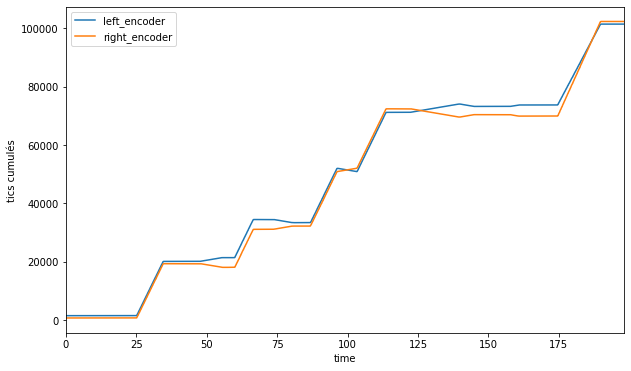

In [178]:
df_encoder.plot(figsize=(10,6))
plt.ylabel('tics cumulés')

Les valeurs correspondent au cumul de toutes les interruptions.

Text(0, 0.5, 'tics pour chaque mesure')

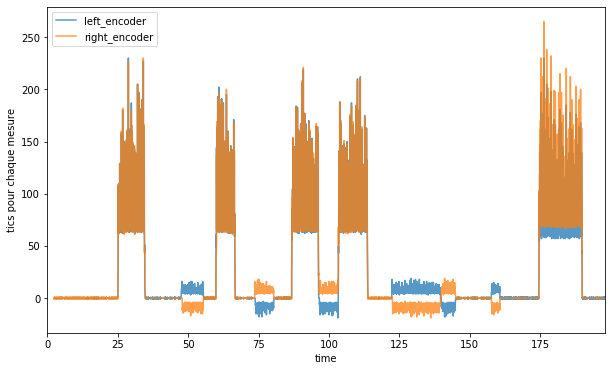

In [179]:
df_encoder.diff().plot(figsize=(10,6), alpha=.75)
plt.ylabel('tics pour chaque mesure')

Si on prend $\Delta{t} = 0.05s$ on a alors : 

In [180]:
t = 0.05

In [181]:
df_encoder['right_rotation_speed'] = (df_encoder
                                      .right_encoder
                                      .diff()
                                      / t
                                      * 2 * np.pi 
                                      / 4096)
df_encoder['left_rotation_speed'] = (df_encoder
                                      .left_encoder
                                      .diff()
                                     / t
                                      * 2 * np.pi 
                                      / 4096)

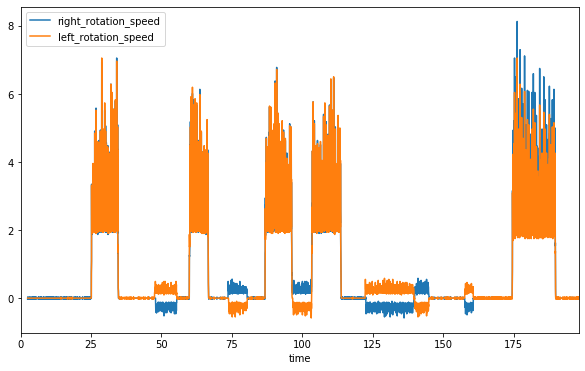

In [182]:
plt.figure(figsize=(10,6))
df_encoder.right_rotation_speed.plot(label='right_rotation_speed')
df_encoder.left_rotation_speed.plot(label='left_rotation_speed')
plt.legend()

In [183]:
r = 33 * 1e-3
L = 80 * 1e-3

In [184]:
df_encoder['speed'] = r * (df_encoder.right_rotation_speed + df_encoder.left_rotation_speed) / 2
df_encoder['angular_velocity'] = r * (df_encoder.right_rotation_speed - df_encoder.left_rotation_speed) / (2 * L)

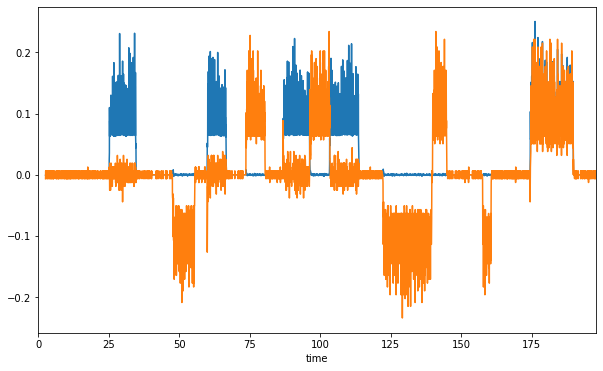

In [185]:
plt.figure(figsize=(10,6))
df_encoder.speed.plot()
df_encoder.angular_velocity.plot()

In [197]:
df_encoder['delta_theta'] = df_encoder.angular_velocity * t
df_encoder['delta_speed'] = df_encoder.speed * t
df_encoder['theta'] = df_encoder.delta_theta.cumsum()
df_encoder['delta_x'] = df_encoder.delta_speed * np.cos(df_encoder.theta)
df_encoder['delta_y'] = df_encoder.delta_speed * np.sin(df_encoder.theta)
df_encoder['x'] = df_encoder.delta_x.cumsum()
df_encoder['y'] = df_encoder.delta_y.cumsum()

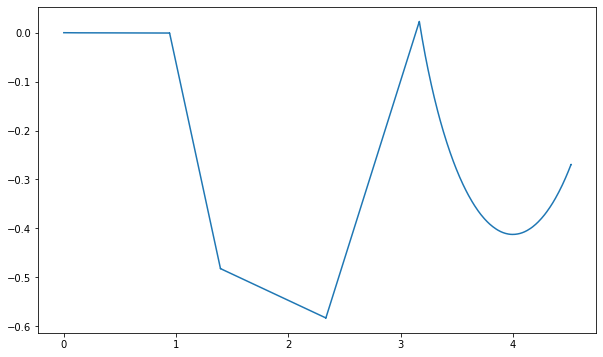

In [205]:
plt.figure(figsize=(10,6))
plt.plot(df_encoder.x, df_encoder.y)